## Elipsoide Problema Direto Emerson Teste 1 - Diego Takahashi Tomazella

## Coisas para importar

In [52]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [53]:
import Elipsoide_Clark_FAT_Unificado as me

## Input

In [54]:
Xp = np.array([-100., -50., 0., 50., 100., 150., 200.])
Yp = np.zeros_like(Xp)
Zp = np.zeros_like(Xp)

#xc posicao x , yc posição y e h profundidade reais
xc = 0.
yc = 0.
zc = 250.

# Orientacoes do elipsoide
azimuth = 90.
azimuth_O = 20.
delta = 45.
gamma = 0.

# Eixos do elipsoide
a = 175.
b = 75.
a_O = 75.
b_O = 150.

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., -65., -35.0    #nT, graus, graus

################################################################################################################################
################################################################################################################################

model_P = []
# Create a ellipsoid model (Prolate)
model_P.append(me.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, b, azimuth, delta, gamma, 
                          {'remanence': np.array([12000, 90., 0.]),
                           'k1': np.array([0.12, 0., 90.]),
                           'k2': np.array([0.10, 0., 180.]),
                           'k3': np.array([0.08, 90., 0.])}
                          ))

################################################################################################################################
################################################################################################################################

model_O = []
# Create a ellipsoid model (Prolate)
model_O.append(me.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a_O, b_O, b_O, azimuth_O, delta, gamma, 
                          {'remanence': np.array([12000, 90., 0.]),
                           'k1': np.array([0.12, 0., 90.]),
                           'k2': np.array([0.10, 0., 180.]),
                           'k3': np.array([0.08, 90., 0.])}
                          ))

## Cálculos

In [55]:
# Calculate the anomaly for a given regional field (Prolate)
JRD_cart_P = me.jrd_cartesiano (inten,inc,dec,model_P)
Bx_P = me.bx_c (Xp,Yp,Zp,inten,inc,dec,model_P)
By_P = me.by_c (Xp,Yp,Zp,inten,inc,dec,model_P)
Bz_P = me.bz_c (Xp,Yp,Zp,inten,inc,dec,model_P)
Tf_P = me.tf_c (Xp,Yp,Zp,inten,inc,dec,model_P)

In [56]:
JRD_cart_P

[[6667.7846845203267, 67.765686280430202, -57.599187914680257]]

In [57]:
# Calculate the anomaly for a given regional field (Oblate)
JRD_cart_O = me.jrd_cartesiano (inten,inc,dec,model_O)
Bx_O = me.bx_c (Xp,Yp,Zp,inten,inc,dec,model_O)
By_O = me.by_c (Xp,Yp,Zp,inten,inc,dec,model_O)
Bz_O = me.bz_c (Xp,Yp,Zp,inten,inc,dec,model_O)
Tf_O = me.tf_c (Xp,Yp,Zp,inten,inc,dec,model_O)

## Resultado da minha função

In [58]:
print Bz_P

[ 2129.51125817  2914.58933671  3102.1514035   2450.40004605  1469.3456749
   693.8917546    239.54323104]


In [59]:
print Bz_O

[ -9.50240974e+08  -8.68579003e+08  -8.80598056e+08  -9.74009442e+08
  -1.14224281e+09  -1.38486165e+09  -1.70472144e+09]


In [60]:
print Tf_P

[-1704.67124074 -2697.10420101 -3266.44687136 -2942.56622291 -2064.3734482
 -1224.28686611  -652.4413928 ]


In [61]:
print Tf_O

[  4.75989665e+08   4.35083162e+08   4.41103502e+08   4.87895070e+08
   5.72166401e+08   6.93698617e+08   8.53921965e+08]


## Resultado proveniente de outra implementação

In [62]:
Bz_Emerson = np.array([2128.8, 2921.4, 3117.2, 2468.1, 1484.0, 704.3, 246.7])
Bz_Emerson

array([ 2128.8,  2921.4,  3117.2,  2468.1,  1484. ,   704.3,   246.7])

In [63]:
Bz_Emerson_O = np.array([4642.5, 5077.4, 4337.6, 2994.0, 1705.4, 769.6, 202.3])
Bz_Emerson_O

array([ 4642.5,  5077.4,  4337.6,  2994. ,  1705.4,   769.6,   202.3])

In [64]:
Bt_Emerson = np.array([-1690.1, -2686.1, -3262.6, -2943.8, -2066.5, -1225.5, -652.9])
Bt_Emerson

array([-1690.1, -2686.1, -3262.6, -2943.8, -2066.5, -1225.5,  -652.9])

In [65]:
Bt_Emerson_O = np.array([-3075.8, -4708.3, -4596.4, -3646.8, -2475.3, -1477.9, -776.2])
Bt_Emerson_O

array([-3075.8, -4708.3, -4596.4, -3646.8, -2475.3, -1477.9,  -776.2])

## Resultados

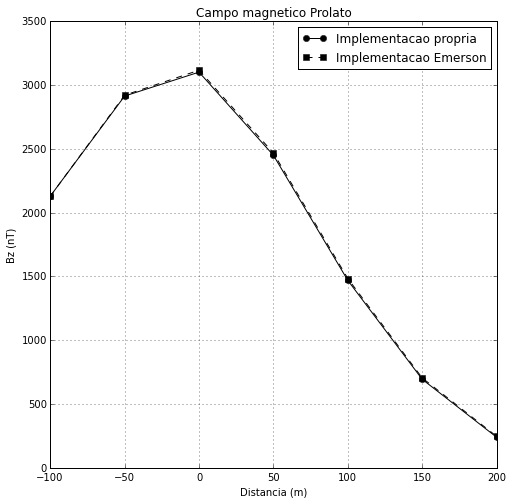

In [66]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Bz_P, '-ko', label="Implementacao propria")
plt.plot(Xp, Bz_Emerson, '--ks', label="Implementacao Emerson")
plt.xlabel('Distancia (m)')
plt.ylabel('Bz (nT)')
plt.title('Campo magnetico Prolato')
plt.grid(True)
plt.legend()
#plt.savefig('Bz_Emerson.jpg', dpi=200)
plt.show()

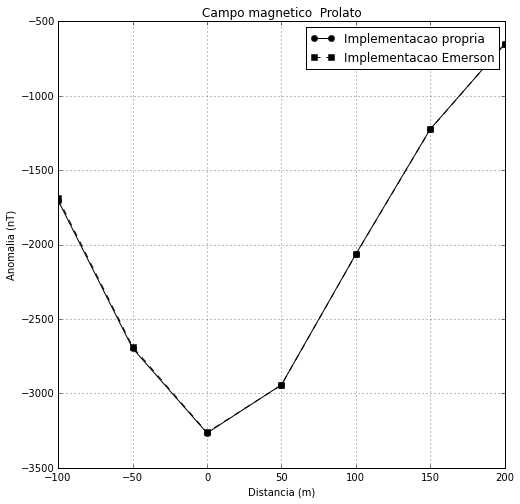

In [67]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Tf_P, '-ko', label='Implementacao propria')
plt.plot(Xp, Bt_Emerson, '--ks', label="Implementacao Emerson")
plt.xlabel('Distancia (m)')
plt.ylabel('Anomalia (nT)')
plt.title('Campo magnetico  Prolato')
plt.grid(True)
plt.legend()
#plt.savefig('Anomalia_Emerson.jpg', dpi=200)
plt.show()

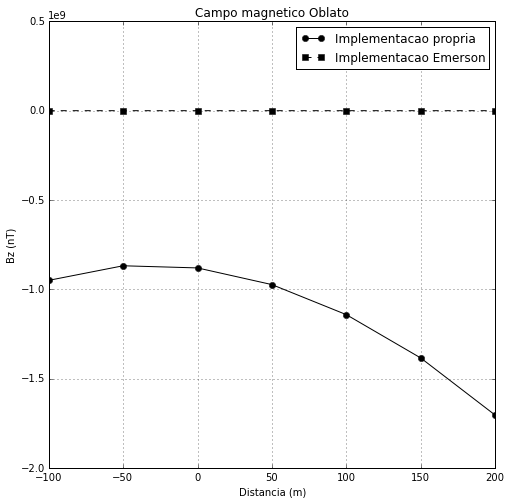

In [68]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Bz_O, '-ko', label="Implementacao propria")
plt.plot(Xp, Bz_Emerson_O, '--ks', label="Implementacao Emerson")
plt.xlabel('Distancia (m)')
plt.ylabel('Bz (nT)')
plt.title('Campo magnetico Oblato')
plt.grid(True)
plt.legend()
#plt.savefig('Bz_Emerson.jpg', dpi=200)
plt.show()

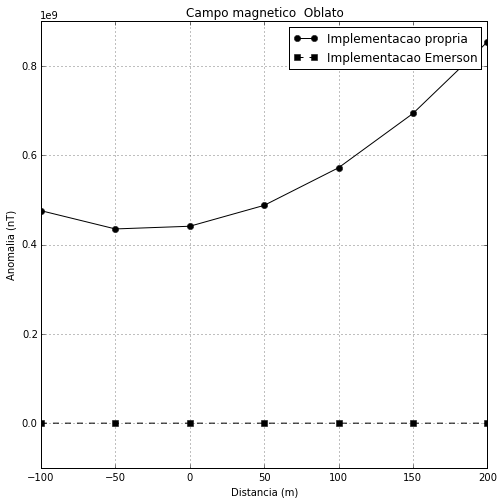

In [69]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Tf_O, '-ko', label='Implementacao propria')
plt.plot(Xp, Bt_Emerson_O, '--ks', label="Implementacao Emerson")
plt.xlabel('Distancia (m)')
plt.ylabel('Anomalia (nT)')
plt.title('Campo magnetico  Oblato')
plt.grid(True)
plt.legend()
#plt.savefig('Anomalia_Emerson.jpg', dpi=200)
plt.show()

## Teste de validação

In [70]:
Bz_Emerson/Bz_P

array([ 0.999666  ,  1.00233675,  1.00485102,  1.00722329,  1.00997337,
        1.01499981,  1.02987673])

In [71]:
Bz_Emerson_O/Bz_O

array([ -4.88560284e-06,  -5.84563981e-06,  -4.92574333e-06,
        -3.07389217e-06,  -1.49302756e-06,  -5.55723380e-07,
        -1.18670415e-07])

In [72]:
Bt_Emerson/Tf_P

array([ 0.99145217,  0.99591999,  0.99882231,  1.00041929,  1.00103012,
        1.00099089,  1.00070291])

In [73]:
Bt_Emerson_O/Tf_O

array([ -6.46190500e-06,  -1.08216093e-05,  -1.04202301e-05,
        -7.47455801e-06,  -4.32618902e-06,  -2.13046410e-06,
        -9.08982356e-07])